In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.metrics import mean_absolute_error,mean_squared_error
#plt.style.use(['dark_background'])

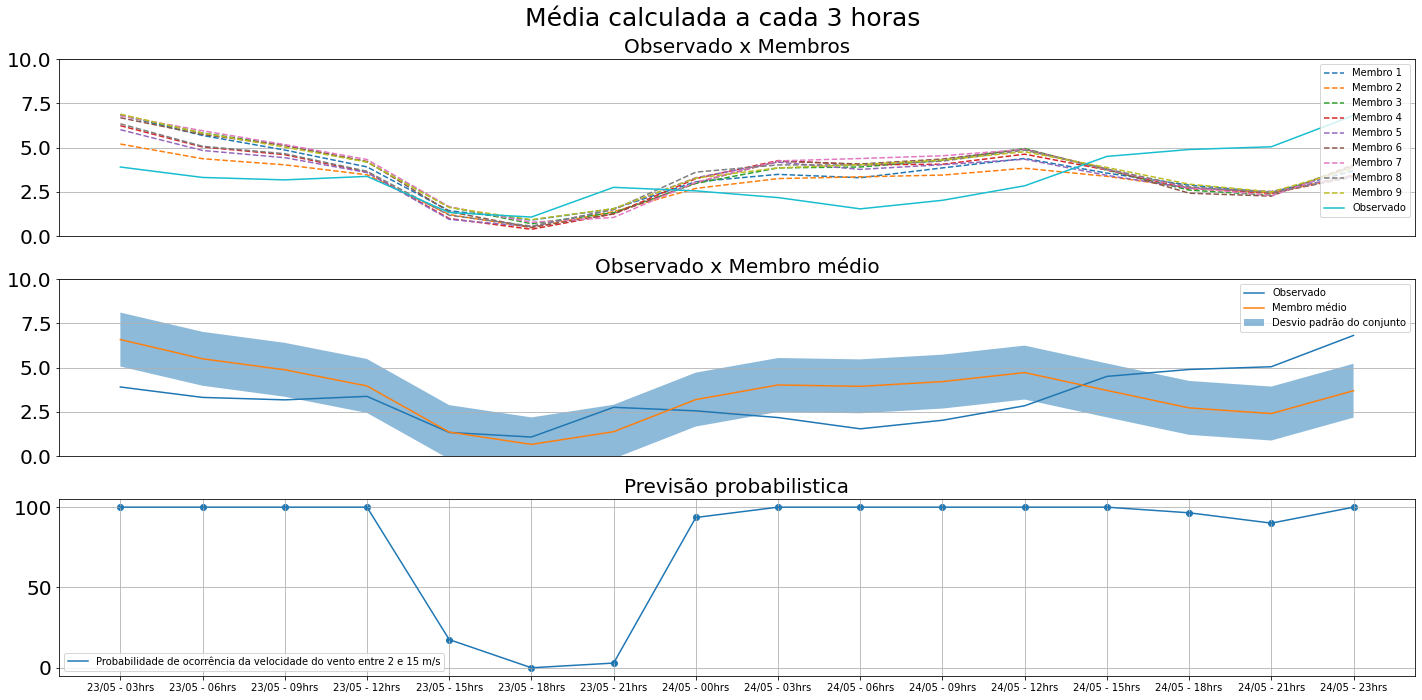

In [2]:
d = pd.read_csv('../tcc/data/ecc1_.csv')
dCaso1 = d[(d.data>'2018-05-23') & (d.data<'2018-05-25')]
dCaso1.index=dCaso1.data
predict = pd.read_csv('./data_ensemble.c1.csv')
predict = predict[(predict['times']>='2018-05-23') & (predict['times']<'2018-05-25')]
predict.index=pd.to_datetime(predict.times )
# preparar dado para vizualizar em boxplot, considerando cada intervalo de 3 hras
p1=[]
p2=[]
p3=[]
p4=[]
p5=[]
p6=[]
p7=[]
p8=[]
p9=[]
box=[]
datas=[]
list_date = pd.date_range(datetime.datetime(2018,5,23,0),datetime.datetime(2018,5,25,0),freq='3H')
for time in list_date[:-1]:
    time_i, time_f = time, time+datetime.timedelta(hours=3)
    df = predict.loc[str(time_i):str(time_f)]
    p1.append(list(map(float,df[df['membro']==1].wspd108.astype('float').to_list())))    
    p2.append(list(map(float,df[df['membro']==2].wspd108.astype('float').to_list())))
    p3.append(list(map(float,df[df['membro']==3].wspd108.astype('float').to_list())))
    p4.append(list(map(float,df[df['membro']==4].wspd108.astype('float').to_list())))
    p5.append(list(map(float,df[df['membro']==5].wspd108.astype('float').to_list())))
    p6.append(list(map(float,df[df['membro']==6].wspd108.astype('float').to_list())))
    p7.append(list(map(float,df[df['membro']==7].wspd108.astype('float').to_list())))
    p8.append(list(map(float,df[df['membro']==8].wspd108.astype('float').to_list())))
    p9.append(list(map(float,df[df['membro']==9].wspd108.astype('float').to_list())))

    
    box.append(list(map(float,dCaso1.loc[str(time_i):str(time_f)].iloc[:,6].to_list())))
    
    datas.append(list(map(str,dCaso1.loc[str(time_i):str(time_f)].iloc[:,0].to_list()))[-1])
    
newdates=[]
for i in range(len(datas)):
    date_obj = datetime.datetime.strptime(datas[i], '%Y-%m-%d %H:%M:%S')
    newdates.append('{:02d}/{:02d} - {:02d}hrs'.format(date_obj.day,date_obj.month,date_obj.hour))
media_p1=[]
media_p2=[]
media_p3=[]
media_p4=[]
media_p5=[]
media_p6=[]
media_p7=[]
media_p8=[]
media_p9=[]
media_obs=[]
for i in range(0,len(box)):
    media_obs.append(np.mean(box[i]))
    media_p1.append(np.mean(p1[i]))
    media_p2.append(np.mean(p2[i]))
    media_p3.append(np.mean(p3[i]))
    media_p4.append(np.mean(p4[i]))
    media_p5.append(np.mean(p5[i]))
    media_p6.append(np.mean(p6[i]))
    media_p7.append(np.mean(p7[i]))
    media_p8.append(np.mean(p8[i]))
    media_p9.append(np.mean(p9[i]))
mean_ensemble=(np.array(media_p1)+np.array(media_p3)+ \
               np.array(media_p4)+np.array(media_p5)+np.array(media_p6)+ \
               np.array(media_p7)+np.array(media_p8)+np.array(media_p9))/8


df = pd.read_csv('/media/lucasdmarten/HD/backup/projetos/tcc/jupyter_scripts/data_ensemble.c1.csv')
df = df.drop('id',axis=1)
df.index = pd.to_datetime(df['times'])
d = {}
for i in range(1,10):
    Oij = []
    for wspd108 in  df[df['membro']==i].wspd108.values:
        if (wspd108 > 2) & (wspd108 <= 15):
            Oij.append(1)
            name='membro'+str(i)
        else:
            Oij.append(0)
            name='membro'+str(i)
    d.update({str(name):Oij})
previsão_probabilistica = ((np.array(d['membro1'])+np.array(d['membro2'])+np.array(d['membro3'])+np.array(d['membro4'])+np.array(d['membro5'])+np.array(d['membro6'])+np.array(d['membro7'])+np.array(d['membro8'])+np.array(d['membro9']))/9) * 100
list_date = pd.date_range('2018-05-23','2018-05-25',freq='10min')
df_prob = pd.DataFrame({"date":list_date[:-1],"p_prob":previsão_probabilistica[36:-1]})
df_prob.index = pd.to_datetime(df_prob.date)
prob3h=[]
for dtime in pd.date_range('2018-05-23','2018-05-25',freq='3H'):
    dt = datetime.timedelta(hours=3)
    prob3h.append([df_prob.loc[str(dtime):str(dtime+dt)].p_prob.mean(),dtime+dt])    



fig, axs = plt.subplots(3,figsize =(20, 10))
plt.suptitle("Média calculada a cada 3 horas", fontsize=25)


axs[0].grid(True)
axs[0].plot(newdates,media_p1,'--', label='Membro 1')
axs[0].plot(media_p2,'--', label='Membro 2')
axs[0].plot(media_p3,'--', label='Membro 3')
axs[0].plot(media_p4,'--', label='Membro 4')
axs[0].plot(media_p5,'--', label='Membro 5')
axs[0].plot(media_p6,'--', label='Membro 6')
axs[0].plot(media_p7,'--', label='Membro 7')
axs[0].plot(media_p8,'--', label='Membro 8')
axs[0].plot(media_p9,'--', label='Membro 9')
axs[0].plot(media_obs, label="Observado")
axs[0].set_ylim(0,10)
axs[0].legend()
axs[0].get_xaxis().set_visible(False)
axs[0].set_title("Observado x Membros", fontsize=20)
axs[0].tick_params(axis='both', which='major', labelsize=20)


axs[1].plot(newdates,media_obs, label="Observado")
axs[1].plot(mean_ensemble, label="Membro médio")
axs[1].fill_between(range(16), mean_ensemble-np.std(mean_ensemble), mean_ensemble+np.std(mean_ensemble),
                    alpha = 0.5, label='Desvio padrão do conjunto')
axs[1].set_ylim(0,10)
axs[1].grid(True)
axs[1].legend()
axs[1].set_title("Observado x Membro médio", fontsize=20)
axs[1].tick_params(axis='both', which='major', labelsize=20)
axs[1].get_xaxis().set_visible(False)

axs[2].plot(newdates,np.array(prob3h[:-1])[:,0], label='Probabilidade de ocorrência da velocidade do vento entre 2 e 15 m/s')
axs[2].scatter(newdates,np.array(prob3h[:-1])[:,0])
axs[2].grid(True)
axs[2].tick_params(axis='both', which='major', labelsize=20)
axs[2].set_title('Previsão probabilistica',fontsize=20)
axs[2].legend()

plt.tight_layout()
plt.xticks(fontsize=10)
plt.savefig('painel_analise_ensemble.png', dpi=300, facecolor='w', edgecolor='w',
          format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
         metadata=None)
plt.show()

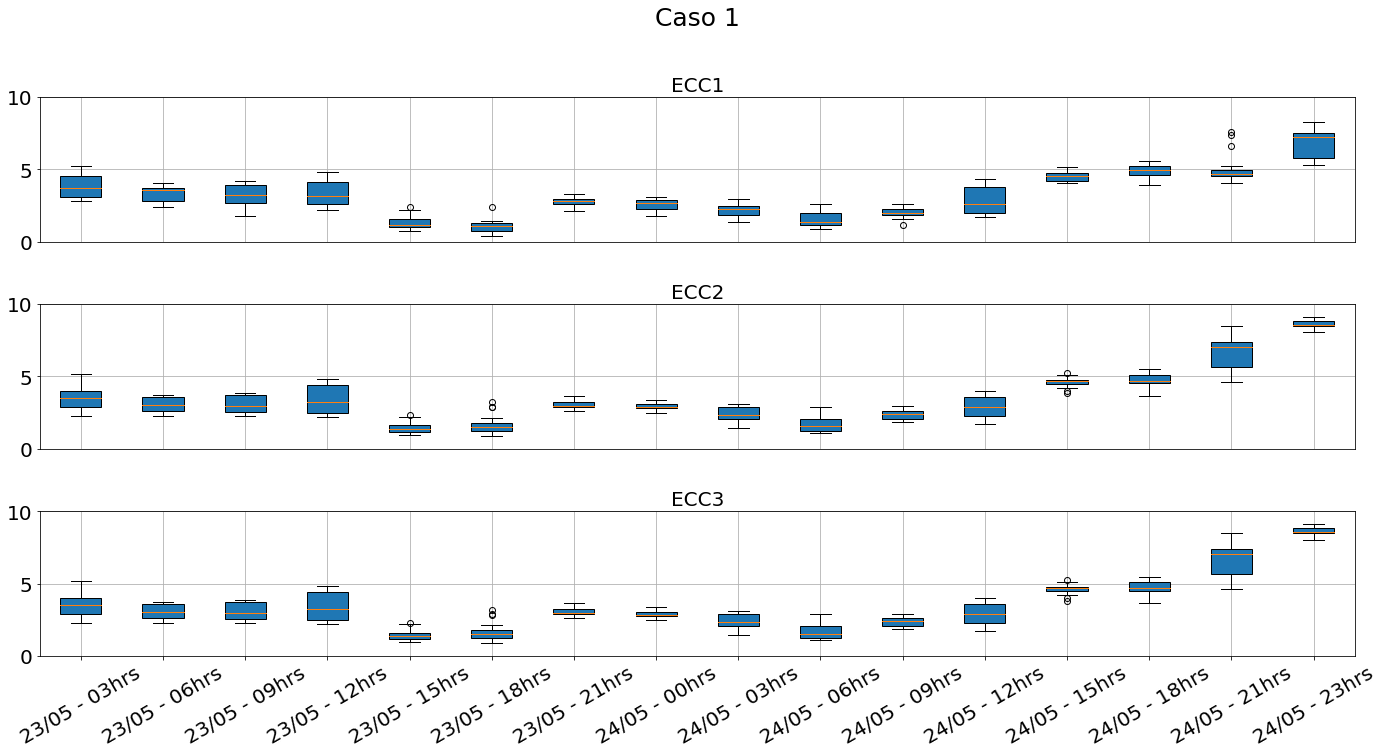

In [3]:
d1 = pd.read_csv('../tcc/data/ecc1_.csv')
d2 = pd.read_csv('../tcc/data/ecc2_.csv')
d3 = pd.read_csv('../tcc/data/ecc3_.csv')


d1Caso1 = d1[(d1.data>'2018-05-23') & (d1.data<'2018-05-25')].iloc[:,[0,6]]
d1Caso1.index = pd.to_datetime(d1Caso1.data)
d2Caso1 = d2[(d2.data>'2018-05-23') & (d2.data<'2018-05-25')].iloc[:,[0,6]]
d2Caso1.index = pd.to_datetime(d2Caso1.data)
d3Caso1 = d3[(d3.data>'2018-05-23') & (d3.data<'2018-05-25')].iloc[:,[0,6]]
d3Caso1.index = pd.to_datetime(d3Caso1.data)


box=[]
datas=[]
box1=[]
box2=[]
box3=[]
list_date = pd.date_range(datetime.datetime(2018,5,23,0),datetime.datetime(2018,5,25,0),freq='3H')
for time in list_date[:-1]:
    time_i, time_f = time, time+datetime.timedelta(hours=3)
    df = predict.loc[str(time_i):str(time_f)]
    
    box1.append(list(map(float,d1Caso1.loc[str(time_i):str(time_f)].vs_med.astype('float').to_list())))
    box2.append(list(map(float,d2Caso1.loc[str(time_i):str(time_f)].vs_med.astype('float').to_list())))
    box3.append(list(map(float,d3Caso1.loc[str(time_i):str(time_f)].vs_med.astype('float').to_list())))
    datas.append(list(map(str,dCaso1.loc[str(time_i):str(time_f)].iloc[:,0].to_list()))[-1])

    
    
    
    
fig, axs = plt.subplots(3,figsize =(20, 10))
axs[0].boxplot(x=box1,vert=True, patch_artist=True, labels=newdates)
axs[0].grid(True)
axs[0].set_title('ECC1',fontsize=20)
axs[0].set_ylim(0,10)
axs[0].tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelsize=20)


axs[1].boxplot(x=box2,vert=True, patch_artist=True, labels=newdates)
axs[1].grid(True)
axs[1].set_title('ECC2',fontsize=20)
axs[1].set_ylim(0,10)
axs[1].tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelsize=20)


axs[2].boxplot(x=box2,vert=True, patch_artist=True, labels=newdates)
axs[2].grid(True)
axs[2].set_title('ECC3',fontsize=20)
axs[2].set_ylim(0,10)
axs[2].tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    labelsize=20)


plt.suptitle("Caso 1", fontsize=25)



fig.tight_layout(pad=3.0)
plt.xticks(rotation=30)
plt.savefig('boxplots_caso1.png', dpi=300, facecolor='w', edgecolor='w',
          format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
         metadata=None)
plt.show()

In [4]:
l_ensemble = [media_p1,media_p2,media_p3,media_p4,media_p5,media_p6,media_p7,
             media_p8,media_p9,mean_ensemble]
i=1
d={}
for membro in l_ensemble:
    
    
    if i == 10:
        l = [mean_squared_error(membro,media_obs),
             mean_absolute_error(membro,media_obs),
             np.mean(membro)-np.mean(media_obs)]
        d.update({"ens_mean":l})
    else:
        l = [mean_squared_error(membro,media_obs),
             mean_absolute_error(membro,media_obs),
             np.mean(membro)-np.mean(media_obs)]
        d.update({"Membro {}".format(i):l})
    
    i+=1
x = pd.DataFrame(d,index=['REMQ','EMA','BIAS'])
x['caso'] = 1
x

Membro 1  Membro 2  Membro 3  Membro 4  Membro 5  Membro 6  Membro 7  \
REMQ  3.204387  2.344296  3.854514  3.516858  3.129240  3.975650  4.251961   
EMA   1.542398  1.257899  1.743589  1.653541  1.560149  1.772754  1.837350   
BIAS  0.285439 -0.163880  0.431122  0.202287  0.142505  0.416618  0.513827   

      Membro 8  Membro 9  ens_mean  caso  
REMQ  3.548058  3.696471  3.587558     1  
EMA   1.652941  1.690411  1.667761     1  
BIAS  0.298713  0.504604  0.349389     1

[[1.         0.36806008]
 [0.36806008 1.        ]]


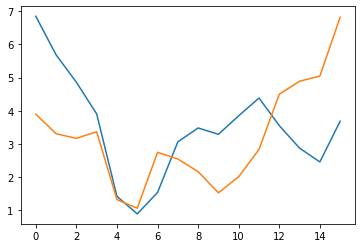

In [5]:
print(np.corrcoef(media_p2,media_obs))
plt.plot(media_p1)
plt.plot(media_obs)

[[1.         0.23974313]
 [0.23974313 1.        ]]


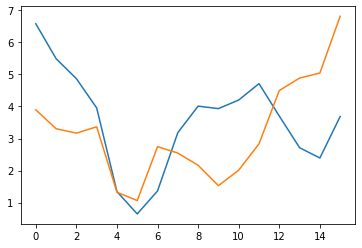

In [6]:
print(np.corrcoef(mean_ensemble,media_obs))
plt.plot(mean_ensemble)
plt.plot(media_obs)

In [7]:
media_p2
media_p3
media_p4
media_p5
media_p6
media_p7
media_p8
media_p9
media_obs

[3.896842105263158,
 3.306842105263158,
 3.1684210526315786,
 3.366842105263158,
 1.3236842105263158,
 1.0647368421052632,
 2.7468421052631578,
 2.5463157894736845,
 2.166315789473684,
 1.5289473684210526,
 2.013684210526316,
 2.8347368421052637,
 4.497368421052631,
 4.887894736842106,
 5.043684210526315,
 6.816111111111111]

In [20]:
d = pd.read_csv('../tcc/data/ecc1_.csv')
dCaso1 = d[(d.data>'2018-09-23') & (d.data<'2018-09-25')]
dCaso1.index=dCaso1.data

In [30]:
len(vento)

288

In [45]:
predicts = pd.read_csv('./data_ensemble.c2.csv')
predicts = predict[predict.times>='2018-09-23']


id                times         T2         R2        TD2       PSFC  \
36    36  2018-09-23 00:00:00  296.25198  84.217000  20.077934  972.62920   
37    37  2018-09-23 00:10:30  296.23734  84.321620  20.083382  972.69670   
38    38  2018-09-23 00:21:00  296.25220  84.247910  20.083967  972.83420   
39    39  2018-09-23 00:30:00  296.21368  84.387540  20.072927  972.90500   
40    40  2018-09-23 00:40:30  296.13860  84.634125  20.046478  972.96436   
..   ...                  ...        ...        ...        ...        ...   
320  320  2018-09-24 23:21:00  291.33224  67.786120  12.040693  981.69070   
321  321  2018-09-24 23:30:00  291.39612  66.616040  11.840853  981.60876   
322  322  2018-09-24 23:40:30  291.56192  65.141500  11.663320  981.84750   
323  323  2018-09-24 23:51:00  291.58307  64.392240  11.510756  982.07960   
324  324  2018-09-25 00:00:00  291.55300  64.014710  11.394830  982.18520   

       wspd10      wdir10    wspd67      wdir65     wspd88    wspd108  \
36   4.559193    7.236340  9.074709    8.396154   9.972616  10.798054   
37   4.667887    7.437643  9.180760    8.632541  10.112453  10.968449   
38   4.803448    8.245328  9.331616    9.396468  10.293313  11.175667   
39   4.758232    9.314063  9.311197    9.953588  10.296070  11.198348   
40   4.742095    9.294107  9.399345    9.731945  10.408967  11.331823   
..        ...         ...       ...         ...        ...        ...   
320  5.407544  127.195650  9.589241  124.464398  10.647258  11.642121   
321  5.738188  126.968544  9.802343  124.345545  10.806152  11.751483   
322  5.942338  126.324490  9.854162  123.992731  10.801628  11.694614   
323  5.999660  125.740490  9.852519  123.499688  10.763061  11.621148   
324  6.087340  124.259476  9.908986  122.237235  10.794004  11.627807   

        wdir106  membro  
36     9.087904       1  
37     9.012361       1  
38     9.285893       1  
39     9.400540       1  
40     8.818439       1  
..          ...     ...  
320  122.272740       1  
321  122.167819       1  
322  121.947204       1  
323  121.592367       1  
324  120.560953       1  

[289 rows x 14 columns]

In [75]:
vento_obs = d1Caso1.values[:,1].astype('float')
o=[]
p={}
n=0
while n<=9:
    
    n_membro = 'membro {}'.format(n)
    vento_pred = predicts[predicts.membro==n].wspd108.astype('float16').values

    e=[]
    for i in range(len(vento_obs)):

        if n == 0:
            if vento_obs[i] <= 5:
                o.append(0)

            elif vento_obs[i] >= 15:
                o.append(0)

            else:
                o.append(1)
        
        elif n >= 1:
            if vento_pred[i] <= 5:
                e.append(0)

            elif vento_pred[i] >= 15:
                e.append(0)

            else:
                e.append(1)
        
            p.update({n_membro:e})
    n += 1

In [104]:
k = p.keys()
x=0
for key in k:
    x += np.array(p.get(key))
m = x/9

In [108]:
len(m)

288

In [107]:
len(o)

288

In [109]:
f_parte=[]
for i in range(len(m)):
    f_parte.append( (m[i]-o[i])**2 )

In [111]:
sum(f_parte)/9

20.484224965706446